## Loading datasets from tensorflow.datasets library

In [3]:
# !pip install --upgrade tensorflow-datasets

In [1]:
import tensorflow_datasets as tfds

print(len(tfds.list_builders()))
print(tfds.list_builders()[:5])

432
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']


In [2]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bridge_data_msr',
 'bucc',
 'c4',
 'c4_ws

In [4]:
cifar100_bldr = tfds.builder('cifar100')

print(cifar100_bldr.info.features)
print('\n', 30*"=", '\n')
print(cifar100_bldr.info.features.keys())
print('\n', 30*"=", '\n')
print(cifar100_bldr.info.features['image'])
print('\n', 30*"=", '\n')
print(cifar100_bldr.info.features['label'])
print('\n', 30*"=", '\n')
print(cifar100_bldr.info.citation)

FeaturesDict({
    'coarse_label': ClassLabel(shape=(), dtype=int64, num_classes=20),
    'id': Text(shape=(), dtype=string),
    'image': Image(shape=(32, 32, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=100),
})


dict_keys(['id', 'image', 'label', 'coarse_label'])


Image(shape=(32, 32, 3), dtype=uint8)


ClassLabel(shape=(), dtype=int64, num_classes=100)


@TECHREPORT{Krizhevsky09learningmultiple,
    author = {Alex Krizhevsky},
    title = {Learning multiple layers of features from tiny images},
    institution = {},
    year = {2009}
}


In [5]:
cifar100_bldr.download_and_prepare()

In [6]:
datasets = cifar100_bldr.as_dataset(shuffle_files=False)


datasets.keys()

dict_keys(['train', 'test'])

In [9]:
import tensorflow as tf
ds_train = datasets['train']
assert isinstance(ds_train, tf.data.Dataset)

example = next(iter(ds_train))
print(type(example))
print(example.keys())

<class 'dict'>
dict_keys(['coarse_label', 'id', 'image', 'label'])


In [10]:
ds_train = ds_train.map(lambda item:
    (item['image'], tf.cast(item['label'], tf.int32)))

In [11]:
ds_train = ds_train.batch(18)
images, labels = next(iter(ds_train))

print(images.shape, labels)

(18, 32, 32, 3) tf.Tensor([66 23 40 39  7 15 11 44 76 50 57 69  1 26 30 42 61 65], shape=(18,), dtype=int32)


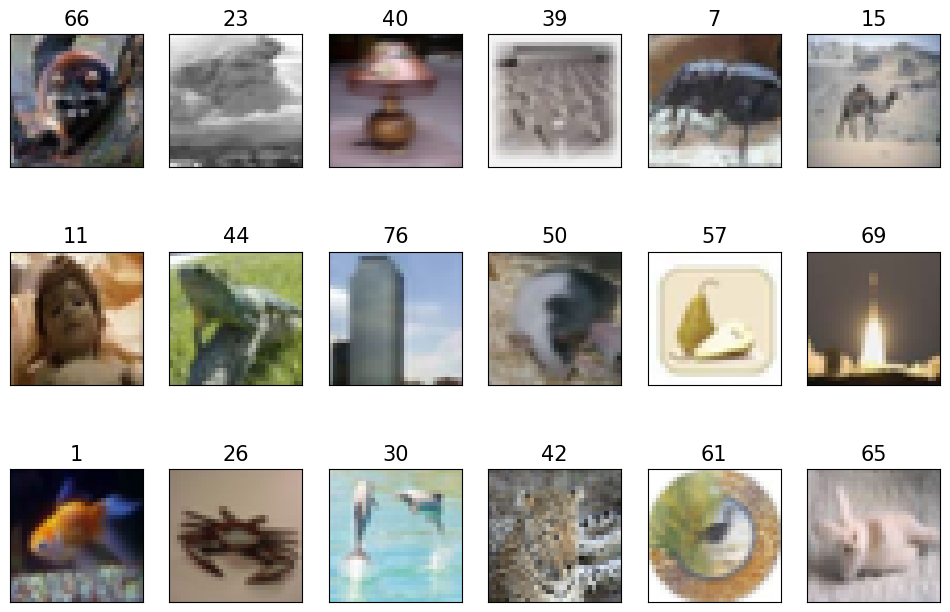

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))
for i, (image, label) in enumerate(zip(images, labels)):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title('{}'.format(label), size=15)
plt.show()

### Another approach to loading datasets